In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('22624 KCH FINAL DOWNLOAD DiFG.xlsx')
df

,Create a code for each comment (FF_001),Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,NaN,Ensure public library provides the same servic...
1,NaN,Carbon footprint. Scamming political climate. ...
2,NaN,I would like the team to consider missing out ...
3,NaN,No
4,NaN,NaN
...,...,...
415,NaN,NaN
416,NaN,Don’t add kirklees to any building.
417,NaN,Don’t design them anything like the disgracefu...
418,NaN,Don’t plaster the horrible name kirklees on an...


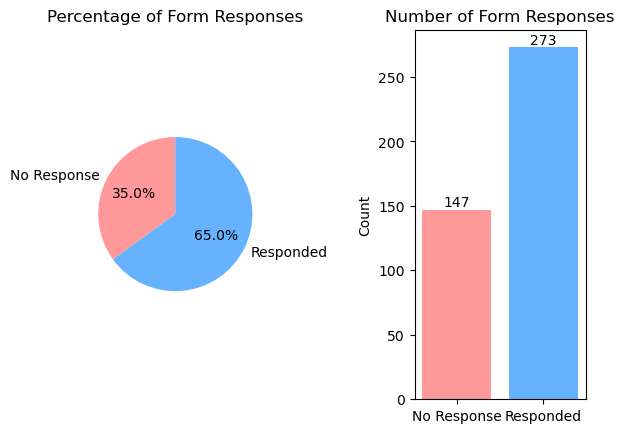

In [33]:
import matplotlib.pyplot as plt

# Calculate the number and percentage of empty or 'No' responses
empty_responses = len(df[df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].isnull() | (df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'] == 'No')])
total_responses = len(df)
count_no_response = empty_responses
count_responded = total_responses - empty_responses

# Create labels for the pie chart and bar chart
labels = ['No Response', 'Responded']
sizes = [count_no_response, count_responded]
colors = ['#FF9999', '#66B2FF']

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Form Responses')

# Plot the bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(labels, sizes, color=colors)
plt.ylabel('Count')
plt.title('Number of Form Responses')

# Add annotations to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.9)

# Display the charts
plt.show()


In [34]:

# Generate the code values
df['Create a code for each comment (FF_001)'] = df.index.map(lambda x: f"FF{x+1:03d}")
df_1 = df.dropna(subset=['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?']).drop(df[df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?']=='No'].index)

# Rename a column in df_1
df_1.rename(columns={"Create a code for each comment (FF_001)": "Comment_ID"}, inplace=True)
# Print the updated dataframe
df_1


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,FF001,Ensure public library provides the same servic...
1,FF002,Carbon footprint. Scamming political climate. ...
2,FF003,I would like the team to consider missing out ...
5,FF006,Covered outdoor space for concerts and getting...
6,FF007,You really need to find a way to address the c...
...,...,...
414,FF415,Remove the Green space Huddersfield has Three ...
416,FF417,Don’t add kirklees to any building.
417,FF418,Don’t design them anything like the disgracefu...
418,FF419,Don’t plaster the horrible name kirklees on an...


In [35]:
# Extract the values of the column into a list
recommendations_list = df_1["Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?"].tolist()


In [36]:
recommendations_list

['Ensure public library provides the same service. The library service is not just about lending books',
 'Carbon footprint. Scamming political climate. Dismissal of deep any affections for what is good to assign a global commons.',
 "I would like the team to consider missing out the museum. I would, ideally, like the team to consider building something that would be Huddersfield's answer to Tropical World (without the animals). Tropical World in Roundhay Park, Leeds is a place where people are reminded of the importance of preserving the natural world. It adds to the usual themes of eating, drinking and consuming. This could be a leisure destination for anybody interested in conservation/wildlife/the future of the planet. It could serve vegan food. It could be very eco-friendly - compostable cups, plastic free, responsibly sourced food. Businesses that are carbon neutral could be encouraged. It could be a green destination. I think we need to lead by example and inspire people to do m

In [37]:
import re
import pandas as pd


# Create a regex pattern to match sentences
pattern = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"

# Split the values with multiple sentences into different observations
split_values = df_1['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.split(pattern)

# Create a new dataframe to store the split observations
new_rows = []
for i, value in enumerate(split_values):
    if len(value) > 1:
        current_code = f"F{i+1:03d}"
        for j, sentence in enumerate(value):
            new_code = f"{current_code}{j+1:02d}"
            new_rows.append({
                'Comment_ID': new_code,
                'Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?': sentence
            })
    else:
        current_code = f"F{i+1:03d}"
        new_code = f"{current_code}00"
        new_rows.append({
            'Comment_ID': new_code,
            'Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?': value[0]
        })

new_df = pd.DataFrame(new_rows)

# Print the new dataframe
new_df


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,F00101,Ensure public library provides the same service.
1,F00102,The library service is not just about lending ...
2,F00201,Carbon footprint.
3,F00202,Scamming political climate.
4,F00203,Dismissal of deep any affections for what is g...
...,...,...
543,F26900,Remove the Green space Huddersfield has Three ...
544,F27000,Don’t add kirklees to any building.
545,F27100,Don’t design them anything like the disgracefu...
546,F27200,Don’t plaster the horrible name kirklees on an...


•	Where the funding came from
•	Cost 
•	Waste of money
•	Upkeep and maintenance
•	Wider Kirklees
•	Return on investment


In [54]:
# Create a new dataframe with rows containing the word "library"
new_df_financing = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('financing|investment|money|capital|monetary|fund|cost|Wider Kirklees', case=False)]
new_df_financing


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
21,F00900,Think about the cost
24,F01200,Don't waste money on areas that won't be used ...
47,F02205,If not what will the additional cost be of bri...
56,F02402,These would cost much less than the proposals ...
68,F02706,If not give the money to the police to make to...
75,F03002,The entire town has become down at heel and vi...
77,F03102,The development can help define or be a clear ...
88,F03604,We need more high value housing in the very ce...
89,F03605,Instead of big grandiose public buildings whic...
123,F04323,I hope that taken forward that creative and we...


In [40]:
recommendations_financing = new_df_financing["Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?"].tolist()
recommendations_financing


['Think about the cost',
 "Don't waste money on areas that won't be used as you imagine they will",
 'If not what will the additional cost be of bringing this expertise on board?',
 'These would cost much less than the proposals and have a significant benefit for many more potential customers.',
 'If not give the money to the police to make town safer.',
 'The entire town has become down at heel and virtually deserted, a bit of grass (maintained and kept free from antisocial behaviour at what cost?)and diversions directly targeted at a certain type of clientele (the few with any disposable income)  is unlikely to draw disillusioned residents flooding back.',
 'The development can help define or be a clear symbol of our identity, but I’ve lived here for 25 years and struggle to tell others with clarity about my home town - I hope the development is an investment in the people and culture of Huddersfield as much as it about ‘cultural’ building s and space',
 "We need more high value hous

Layout/ Building Design

•	Integration
•	Previous schemes
•	Water
•	Environmental effect
•	Sight lines
•	Sustainability


In [63]:
new_df_building_design = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('layout|design|building|architectural|structure|floor|integration|schemes|water|environmental|effect|sustainability|sight|lines', case=False)]
new_df_building_design


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
6,F00302,"I would, ideally, like the team to consider bu..."
18,F00600,Yes stop it and renovate what we have instead ...
20,F00800,Clean the streets and some of the existing sho...
23,F01100,Accessibility and wow factor - buildings need ...
37,F01903,Availability of drinking water for fill ups.
...,...,...
525,F25800,That the spaces are designed in partnership wi...
531,F26200,Retain as much of the old heritage buildings a...
532,F26300,Designs should be in keeping with the town - m...
544,F27000,Don’t add kirklees to any building.


In [42]:
recommendations_building_design = new_df_building_design["Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?"].tolist()
recommendations_building_design


["I would, ideally, like the team to consider building something that would be Huddersfield's answer to Tropical World (without the animals).",
 'Yes stop it and renovate what we have instead of knocking buildings down',
 'Clean the streets and some of the existing shop fronts, renovate and re use existing buildings',
 'Accessibility and wow factor - buildings need to be amazing to attract audiences outside of region to be sustainable and bring income in',
 'Whilst I like the overall layout of the buildings and green spaces and I understand that you are constrained by having to incorporate listed buildings into the scheme I am also concerned that the plans for individual buildings are lacking in detail.',
 'More ambition and detail on nett zero carbon design features within the various building elements.',
 'This is an ideal place to really showcase some innovation in great design',
 "I don't up understand why we are still at design stage.",
 'Alongside the development of the infrastru

In [68]:
new_df_heritage_culture = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('Heritage|Culture|tradition|legacy|historical|importance|ancestral|customs|modern|stone|community|space|art|music|Yorkshire', case=False)]
#new_df_heritage_culture


In [69]:
new_df_heritage_culture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 7 to 543
Data columns (total 2 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   Comment_ID                                                                                                                                  146 non-null    object
 1   Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?  146 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [72]:
new_df_demolition = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('demolition|remove|destruction|Dismantling|loss|market hall', case=False)]
new_df_demolition


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
94,F03903,I remember the original market hall that was d...
107,F04307,Huddersfield suffered the loss many of it's vi...
157,F05701,Make the market hall a destination - put on ev...
230,F09900,The market hall as a food venue will fail mise...
315,F13902,Even better would be to remove traffic from Qu...
388,F17701,Perhaps removed the poor quality shops and tir...
543,F26900,Remove the Green space Huddersfield has Three ...


In [75]:
# Create a new dataframe with rows containing the word "library"
new_df_library = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains("library|book|reading|information|Knowledge", case=False)]
new_df_library #16+7



,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,F00101,Ensure public library provides the same service.
1,F00102,The library service is not just about lending ...
48,F02206,Where will the local archive (currently part o...
64,F02702,We looked plans pre covid that had a long step...
73,F02902,Well aware from previous evening events and th...
79,F03301,That when they are completed and organisations...
80,F03302,Took me three weeks to book Slaithwaite commun...
91,F03800,"As mentioned above, I particularly question th..."
110,F04310,\n\nI welcome the introduction of a new centra...
111,F04311,I also welcome the proposal to convert the cur...


In [76]:
new_df_library.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 525
Data columns (total 2 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   Comment_ID                                                                                                                                  25 non-null     object
 1   Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?  25 non-null     object
dtypes: object(2)
memory usage: 600.0+ bytes


In [46]:
recommendations_library = new_df_library["Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?"].tolist()
recommendations_library

['Ensure public library provides the same service.',
 'The library service is not just about lending books',
 'Where will the local archive (currently part of the library) be located and how do you envisage a multi-purpose art gallery (also suitable for business events and weddings) working in practice?',
 'We looked plans pre covid that had a long stepped area down to the theatre and additions to the existing library.',
 'Well aware from previous evening events and the car park that some people use the library and car park stairs as a toilet.',
 'That when they are completed and organisations wish to hire them, you will have staff available to take bookings.',
 'Took me three weeks to book Slaithwaite community centre for a moonraking event.',
 'As mentioned above, I particularly question the need for a separate new art gallery building - I would have thought that this could be combined with the museum in the old library, allowing for more open space',
 '\n\nI welcome the introduction

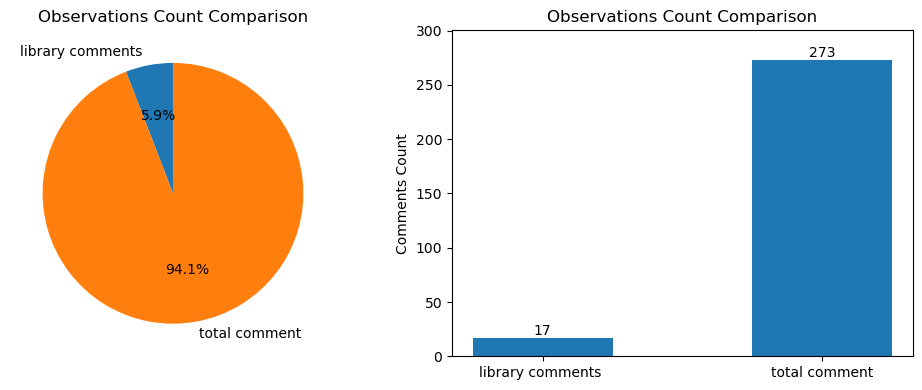

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Count observations in new_df_library2 with the condition
new_df_count = new_df_library["Comment_ID"].str[:4].nunique()

# Count observations in df_1 without applying the condition
df_1_count = len(df_1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart
labels = ['library comments ', 'total comment']
sizes = [new_df_count, df_1_count]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_aspect('equal')
ax1.set_title('Observations Count Comparison')

# Bar chart
x = ['library comments ', 'total comment']
y = [new_df_count, df_1_count]
bars = ax2.bar(x, y, width=0.5)  # Adjust the bar width as desired
ax2.set_ylabel('Comments Count')
ax2.set_title('Observations Count Comparison')

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Increase the y-axis limit
ax2.set_ylim(top=max(y) * 1.1)

# Adjust the layout
plt.tight_layout()

# Display the combined chart
plt.show()


In [48]:
new_df_food_hall = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('food|restaurant|Market|dining|eat|drink|Gastronomy', case=False)]
new_df_food_hall


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
8,F00304,"It adds to the usual themes of eating, drinkin..."
10,F00306,It could serve vegan food.
11,F00307,It could be very eco-friendly - compostable cu...
36,F01902,Toilets and seating are really important for o...
37,F01903,Availability of drinking water for fill ups.
...,...,...
500,F24200,"Independent retail outlets, space for food out..."
501,F24301,Not repeat the mistakes of the past with destr...
514,F25000,Yes Huddersfield as a market town and nothing ...
526,F25901,The Theatre is valued.


In [49]:
new_df_museum_art = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('museum|Gallery|Exhibition|Cultural|Art|Historical|Collection', case=False)]
new_df_museum_art


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
5,F00301,I would like the team to consider missing out ...
16,F00501,You really need to find a way to address the c...
22,F01000,Perhaps a visit to Barnsley town centre to see...
27,F01401,Get started as the public need to see some act...
41,F02101,I'm keen not to loose the creative energy of t...
...,...,...
497,F23900,Sensitivity to existing heritage buildings and...
512,F24800,"Avoid using the names kirklees or quarter, it’..."
525,F25800,That the spaces are designed in partnership wi...
530,F26102,Town centre never feels particularly safe at n...


In [50]:
recommendations_museum_art = new_df_museum_art["Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?"].tolist()
recommendations_museum_art


['I would like the team to consider missing out the museum.',
 'You really need to find a way to address the constraint of the ring road which serves to isolate parts of the town.',
 'Perhaps a visit to Barnsley town centre to see how that has developed culturally and comeercially in the past five years',
 'Get started as the public need to see some action asap.',
 "I'm keen not to loose the creative energy of temporary contemporary some of which involve emerging businesses, and would like to ensure that gallery space will be available for local organisations such as Huddersfield Photo-Imaging Club.",
 "Accessible public toilets throughout the day are essential for such a 'destination' as the cultural heart.",
 'What kind of museum are you proposing?',
 'How will you incorporate the rugby league museum if this is still a viable option?',
 'How will you prioritise what goes in the new museum and does Kirklees Council have the skills and resources in-house to achieve this?',
 'Where will

In [19]:
new_df_museum = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('museum|history', case=False)]
new_df_museum


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
5,F00301,I would like the team to consider missing out ...
44,F02202,What kind of museum are you proposing?
45,F02203,How will you incorporate the rugby league muse...
46,F02204,How will you prioritise what goes in the new m...
83,F03400,Libraries and museums need to be kept where th...
91,F03800,"As mentioned above, I particularly question th..."
248,F10703,I am really pleased about the proposed new mus...
253,F10708,The archive is an essential part of the curren...
254,F10709,It would be a blow to the town if the archive ...
260,F11002,The written heritage of the region is a key pa...


In [20]:
new_df_art_gallery = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('art|gallery', case=False)]
new_df_art_gallery


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
16,F00501,You really need to find a way to address the c...
27,F01401,Get started as the public need to see some act...
41,F02101,I'm keen not to loose the creative energy of t...
42,F02102,Accessible public toilets throughout the day a...
48,F02206,Where will the local archive (currently part o...
...,...,...
468,F21802,A small 100 seater multifunctional space for a...
497,F23900,Sensitivity to existing heritage buildings and...
512,F24800,"Avoid using the names kirklees or quarter, it’..."
525,F25800,That the spaces are designed in partnership wi...


In [21]:
new_df_multi_person = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('Event|Gathering|Social|venue|Meeting|Assembly', case=False)]
new_df_multi_person


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
48,F02206,Where will the local archive (currently part o...
60,F02601,We need to encourage more big name stores to r...
73,F02902,Well aware from previous evening events and th...
75,F03002,The entire town has become down at heel and vi...
80,F03302,Took me three weeks to book Slaithwaite commun...
81,F03303,Even then you left the roof open in mid winter...
117,F04317,\n\nI hold reservations about the proposed venue.
123,F04323,I hope that taken forward that creative and we...
157,F05701,Make the market hall a destination - put on ev...
185,F07401,More good quality bar and restaurant provision...


In [22]:
new_df_parking = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('parking|car|vehicle|storage', case=False)]
new_df_parking


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
2,F00201,Carbon footprint.
12,F00308,Businesses that are carbon neutral could be en...
29,F01500,lots of electric charging points in the new ca...
30,F01601,"Take into consideration access, vehicle access..."
53,F02301,More ambition and detail on nett zero carbon d...
55,F02401,Free parking and covered streets.
61,F02602,"Barnsley, Halifax town centres and more car pa..."
62,F02603,It is especially important to the elderly to h...
73,F02902,Well aware from previous evening events and th...
125,F04401,More parking.


In [23]:
new_df_outdoor  = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('outdoor|air|open', case=False)]
new_df_outdoor

,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
15,F00400,Covered outdoor space for concerts and getting...
57,F02403,"Outdoor spaces will only attract kids, the hom..."
73,F02902,Well aware from previous evening events and th...
81,F03303,Even then you left the roof open in mid winter...
91,F03800,"As mentioned above, I particularly question th..."
95,F04001,"Children, teenagers and people with disabiliti..."
97,F04101,Exhibition space (indoor/outdoor?)for local ar...
109,F04309,Queensgate Market in particular could be celeb...
126,F04402,Kings gate needs to have their parking structu...
140,F04810,Apparently shops are looking at footfall to se...


In [24]:
new_df_safety_maintenance = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('Security|safety|unsafety|maintenance|Protection|Care|Upkeep', case=False)]
new_df_safety_maintenance


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
141,F04811,Bodycare is one of the shops doing this so tha...
168,F06300,Safety and security
173,F06702,People who live in the town centre will care ...
208,F08400,All previous comments apply\nLess focus on you...
210,F08601,Safety of children.
244,F10601,"Lighting, making a well lit area can help ensu..."
290,F12701,Safety - many town centre public spaces feel u...
299,F13200,Realistic foresight in including features that...
335,F14701,"Safety, what children actually want and not de..."
435,F20000,"Safety, quality and type of retail outlets, re..."


In [25]:
new_df_facilities_accessibility = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('facilities|public|accessibility', case=False)]
new_df_facilities_accessibility


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,F00101,Ensure public library provides the same service.
23,F01100,Accessibility and wow factor - buildings need ...
27,F01401,Get started as the public need to see some act...
35,F01901,"Ensure there are well maintained, accessible a..."
39,F01905,Easy accessibility especially for disabled/les...
42,F02102,Accessible public toilets throughout the day a...
72,F02901,Public toilets.
83,F03400,Libraries and museums need to be kept where th...
89,F03605,Instead of big grandiose public buildings whic...
99,F04103,"Public toilets, baby change facilities."


In [26]:
new_df_travel = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('active|travel|Transportation|Mobility|Movement', case=False)]
new_df_travel


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
31,F01602,It would be less attractive if driving to the ...
156,F05600,"Yes, the materials for paved areas & floors to..."
163,F06001,Use some of the buildings the town already has...
311,F13704,It would make the town attractive and liveable.
336,F14702,\nWill the Francis Bacon actually be housed in...
369,F16101,It looks like the design team have no intimate...
371,F16200,Opportunities to be physically active is crucial
411,F18601,"More free, interactive, community purposes."
454,F21303,There are around 20k people with a Blue Badge ...
540,F26703,mobility scooters for them who need them.


In [27]:
new_df_identity = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('identity|Character|Distinctiveness|Unique', case=False)]
new_df_identity 


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
76,F03101,Alongside the development of the infrastructur...
77,F03102,The development can help define or be a clear ...
109,F04309,Queensgate Market in particular could be celeb...
331,F14601,The older buildings are part of our identity a...
531,F26200,Retain as much of the old heritage buildings a...


In [28]:
new_df_offer = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('offer|Community|Services|Benefits|Support', case=False)]
new_df_offer


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
49,F02207,Other major galleries offer these types of thi...
51,F02209,As retail space isn't a major part of the plan...
80,F03302,Took me three weeks to book Slaithwaite commun...
88,F03604,We need more high value housing in the very ce...
101,F04301,I strongly support the proposal to create a ne...
105,F04305,The council should see opportunity to provide ...
113,F04313,The current art gallery is a hugely important ...
119,F04319,I support the ambition to further develop Hudd...
208,F08400,All previous comments apply\nLess focus on you...
260,F11002,The written heritage of the region is a key pa...


In [29]:
new_df_connectivity = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('Network|Interconnectivity|Integration|Linkage|connectivity|connection|mobile', case=False)]
new_df_connectivity


,Comment_ID,Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
36,F01902,Toilets and seating are really important for o...
39,F01905,Easy accessibility especially for disabled/les...
314,F13901,Good cycling and walking connection from river...
397,F18203,Connectivity to bus station and train station.
494,F23700,Integration and reuse of adjacent yards and Ma...
502,F24302,So make sure there is a connection and flow th...
534,F26501,Pedestrian areas & public transport prioritise...


In [30]:
#new_df_miscellaneous = new_df[new_df['Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?'].str.contains('various|different|diverse', case=False)]
#new_df_miscellaneous


In [31]:
import pandas as pd

# Create an Excel writer object
writer = pd.ExcelWriter('dataframes.xlsx')

# Dictionary of dataframes with sheet names
dataframes = {
    'new_df_miscellaneous': new_df_miscellaneous,
    'new_df_building_design': new_df_building_design,
    'new_df_heritage_culture': new_df_heritage_culture,
    'new_df_demolition': new_df_demolition,
    'new_df_library': new_df_library,
    'new_df_outdoor': new_df_outdoor,
    'facilities_accessibility': facilities_accessibility,
    'new_df_identity': new_df_identity,
    'new_df_miscellaneous': new_df_miscellaneous,
    'new_df_connectivity': new_df_connectivity,
    'new_df_offer': new_df_offer,
    'new_df_travel': new_df_travel,
    'new_df_safety_maintenance': new_df_safety_maintenance,
    'new_df_parking': new_df_parking,
    'new_df_art_gallery': new_df_art_gallery,
    'new_df_museum': new_df_museum,
    'new_df_food_hall': new_df_food_hall
}

# Save each dataframe as a sheet in the Excel file
for sheet_name, df in dataframes.items():
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
writer.save()


NameError: name 'new_df_miscellaneous' is not defined

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

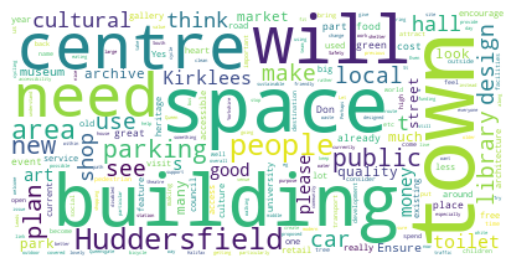

In [45]:
# create a copy of the dataframe
feedback_df_ = df_1.copy()

# rename the column in the copy
feedback_df_.rename(columns={'Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?': 'recommendation_in_design'}, inplace=True)

# drop any row that contains missing values in the recommendation column
feedback_df_.dropna(subset=['recommendation_in_design'], inplace=True)



feedback_df_['recommendation_in_design'] = feedback_df_['recommendation_in_design'].astype(str)

# Creating the text variable
text = " ".join(review for review in feedback_df_.recommendation_in_design)

# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations=False, background_color='white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()



In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Download punkt tokenizer if not already downloaded
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords and create frequency table
word_freq = FreqDist()
for text in recommendations_list:
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    word_freq.update(tokens)

# Print frequency table
print("Word Frequency Table:")
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")


Word Frequency Table:
town: 108
centre: 51
huddersfield: 48
buildings: 48
people: 46
space: 43
would: 38
need: 36
like: 33
spaces: 32
public: 31
parking: 31
new: 30
library: 24
see: 24
local: 23
area: 22
think: 21
plans: 21
make: 21
use: 20
cultural: 20
kirklees: 20
hall: 20
building: 19
toilets: 19
money: 18
also: 18
design: 18
good: 17
could: 17
please: 17
quality: 17
areas: 16
get: 16
park: 15
much: 15
many: 15
market: 15
ensure: 14
car: 14
already: 14
shops: 14
museum: 13
green: 13
archive: 13
art: 13
great: 13
encourage: 13
street: 13
food: 12
really: 12
part: 12
current: 12
needs: 12
free: 11
used: 11
gallery: 11
council: 11
events: 11
look: 11
university: 11
heritage: 11
service: 10
place: 10
yes: 10
existing: 10
cost: 10
visit: 10
years: 10
access: 10
accessible: 10
heart: 10
retail: 10
features: 10
old: 10
architecture: 10
around: 10
consider: 9
attract: 9
outside: 9
less: 9
well: 9
big: 9
back: 9
open: 9
transport: 9
facilities: 9
put: 9
cars: 9
destination: 8
feel: 8
bring: 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
